In [2076]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

In [2077]:
new_df= pd.read_csv(r"df_clean_after_removing_outliers.csv")

# normalized data


In [2078]:
column_names = new_df.columns.tolist()

# Exclude 'c1' from the list of column names if it's present
if 'c1' in column_names:
    column_names.remove('c1')

# Normalization using MinMaxScaler
scaler = MinMaxScaler()
normalized_data = scaler.fit_transform(new_df[column_names])

# Creating a Pandas DataFrame with the normalized data
normalized_df = pd.DataFrame(normalized_data, columns=column_names)

#Now, 'normalized_df' contains the normalized data in Pandas DataFrame format


In [2079]:
normalized_df


,c2,c3,c4,c5,c6,c7,c8,c9,c10,c11,...,c231,c232,c233,c234,c235,c236,c237,c238,c239,c241
0,0.0,0.821048,0.774432,0.797698,0.425286,0.340017,0.813924,0.474407,0.800336,0.810486,...,0.666840,0.623784,0.567504,0.561245,0.103452,0.073821,0.284808,0.642956,0.638040,0.417964
1,0.0,0.821048,0.774432,0.854546,0.226782,0.334315,0.813924,0.515985,0.743410,0.810486,...,0.666840,0.623784,0.567504,0.561245,0.132978,0.068064,0.287033,0.642956,0.647809,0.509822
2,0.0,0.821048,0.774432,0.715114,0.230805,0.133872,0.813924,0.349455,0.801265,0.810486,...,0.666840,0.623784,0.567504,0.561245,0.159175,0.025535,0.254054,0.642956,0.654062,0.241267
3,0.0,0.479084,0.774432,0.728629,0.244958,0.332080,0.813924,0.427216,0.610777,0.810486,...,0.666840,0.623784,0.567504,0.561245,0.105314,0.082313,0.184203,0.476472,0.671587,0.243063
4,0.0,0.658670,0.482840,0.770758,0.230250,0.325546,0.813924,0.429969,0.700920,0.621691,...,0.666840,0.623784,0.567504,0.561245,0.092615,0.086531,0.239826,0.639754,0.697700,0.256726
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,0.0,0.523983,0.582865,0.429645,0.877767,0.208831,0.535529,0.708635,0.356077,0.746407,...,0.884883,0.905271,0.943935,0.746860,0.680107,0.057830,0.575891,0.422319,0.501195,0.000322
1021,0.0,0.545323,0.614187,0.378445,0.909159,0.202092,0.535786,0.673017,0.355220,0.731298,...,0.869435,0.926593,0.959402,0.731161,0.697455,0.061573,0.553137,0.444589,0.464444,0.053353
1022,0.0,0.576429,0.660426,0.414860,0.955935,0.207062,0.528698,0.719753,0.357403,0.722159,...,0.868786,0.932485,0.960684,0.702866,0.685491,0.058455,0.533175,0.403780,0.493901,0.089512
1023,0.0,0.580972,0.666392,0.520138,0.960781,0.201865,0.531449,0.719922,0.348260,0.705025,...,0.895605,0.960180,0.991965,0.718645,0.657375,0.056385,0.523639,0.404087,0.504270,0.116150


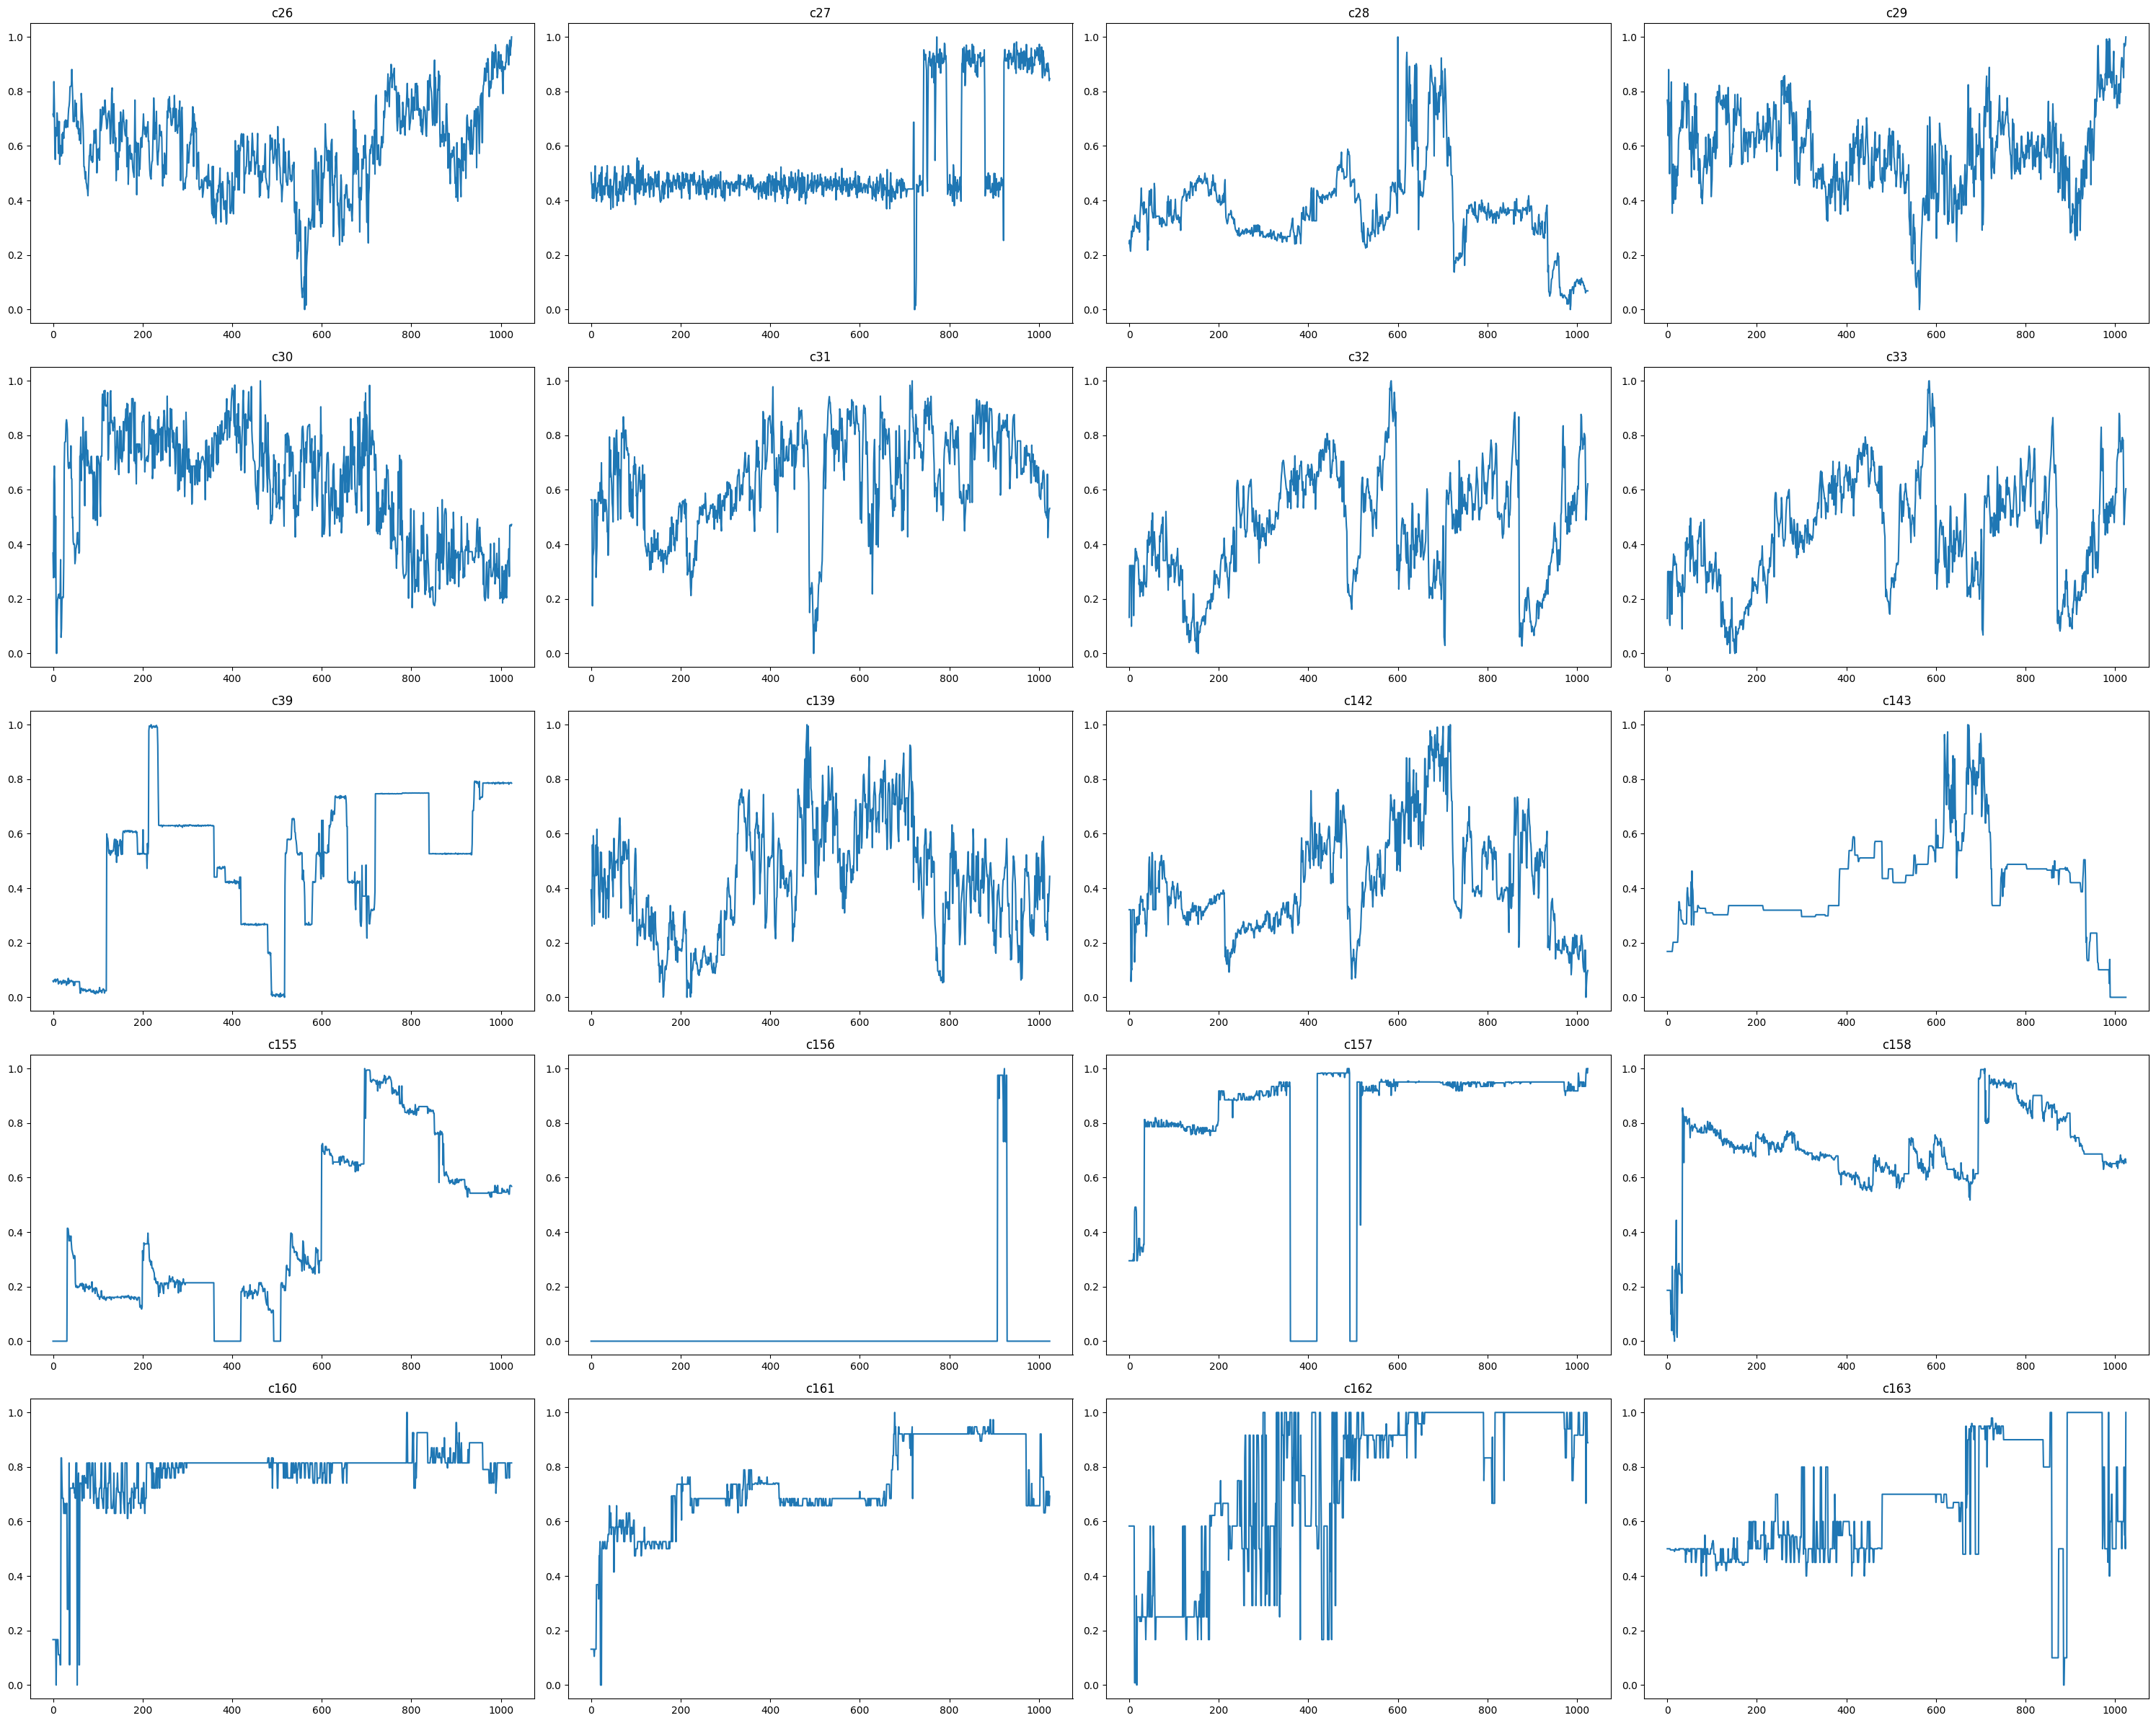

In [2080]:
# only controllable features need to be selected
selected_columns_2=['c26', 'c27', 'c28', 'c29', 'c30', 'c31',"c32" ,'c33', 'c39', 'c139', 'c142', 'c143', 'c155', 'c156', 'c157', 'c158', 'c160', 'c161', 'c162', 'c163']

fig, axes = plt.subplots(nrows=5, ncols=4, figsize=(30, 24))

for i in range(5):
    for j in range(4):
        col_index = i * 4 + j
        if col_index < len(selected_columns_2):
            column_name = selected_columns_2[col_index]
            axes[i, j].plot(normalized_df[column_name])
            axes[i, j].set_title( f"{column_name}")

plt.tight_layout()
plt.show()

In [2081]:
#since c32 and c33 are same we will remove onew of them
selected_columns_2=['c26', 'c27', 'c28', 'c29', 'c30', 'c31','c33', 'c39', 'c139', 'c142', 'c143', 'c155', 'c156', 'c157', 'c158', 'c160', 'c161', 'c162', 'c163']

# Cleaning c161
***when we applied our prediction model without further cleaning the prediction curve was giving highly wrong results at some points and we found that this behaviour was because of some outliers that are still present in c161 column and some other columns as well that we are going to clean further***

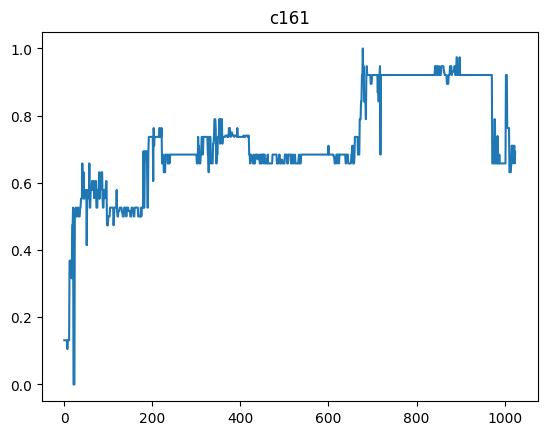

In [2082]:
plt.plot(normalized_df['c161'])
plt.title("c161");

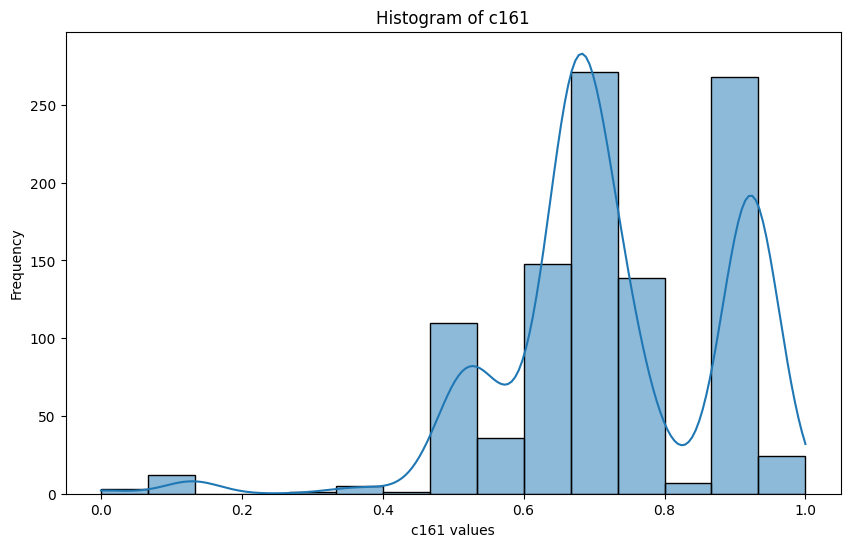

In [2083]:
column='c161'
plt.figure(figsize=(10, 6))
sns.histplot(normalized_df[column], bins=15, kde=True)
plt.title(f'Histogram of {column}')
plt.xlabel('c161 values')
plt.ylabel('Frequency')
plt.show()

**from above histogram we can see that there are very low value less than 0.4 therefore we remmove them using the below cell code**

In [2084]:
# Calculate the IQR for 'c161' column
q1 = normalized_df['c161'].quantile(0.25)
q3 = normalized_df['c161'].quantile(0.75)
iqr = q3 - q1

# Calculate appropriate lower and upper bounds for outliers
lower_bound = q1 -  1.0* iqr
upper_bound = q3 + 1.0* iqr

# Replace outliers with the mean of the remaining data in 'c161' column
normalized_df['c161'] = normalized_df['c161'].apply(lambda x: normalized_df['c161'][(normalized_df['c161'] >= lower_bound) & (normalized_df['c161'] <= upper_bound)].mean() if (x < lower_bound or x > upper_bound) else x)


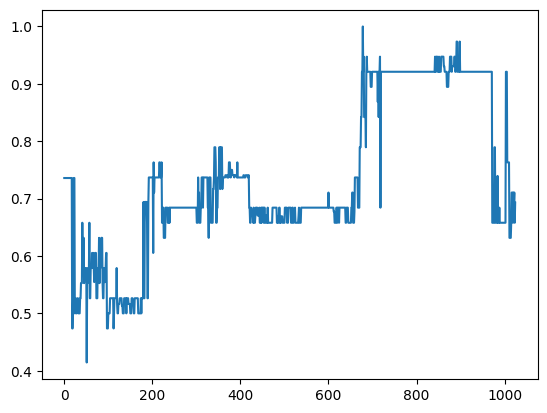

In [2085]:
plt.plot(normalized_df['c161']);

**still some of outliers are still their therefore we will remove them also using the below cell code**

In [2086]:
# Defininng the step size
step_size = 25

new_column_data = []  
for i in range(0, len(normalized_df['c161']), step_size):
    # Get the current 25 data points
    data_subset = normalized_df['c161'].iloc[i:i+step_size].copy()
        
    # Calculate the IQR for the current subset
    q1 = np.percentile(data_subset, 25)
    q3 = np.percentile(data_subset, 75)
    iqr = q3 - q1
        
    # Calculate the lower and upper bounds for outliers
    lower_bound = q1 - 0.5 * iqr
    upper_bound = q3 + 0.5 * iqr
    # Calculate mean for non-outliers within the subset
    subset_mean = data_subset[(data_subset >= lower_bound) & (data_subset <= upper_bound)].mean()
    # Replace outliers with the mean of the 25 data points
    data_subset[data_subset < lower_bound] = subset_mean
    data_subset[data_subset > upper_bound] = subset_mean
    
    # Explicitly cast subset_mean to int before appending to the new_column_data list
    subset_mean = int(subset_mean)
        
    # Append the modified data to the new_column_data list
    new_column_data.extend(data_subset)
    
normalized_df['c161_1'] = new_column_data

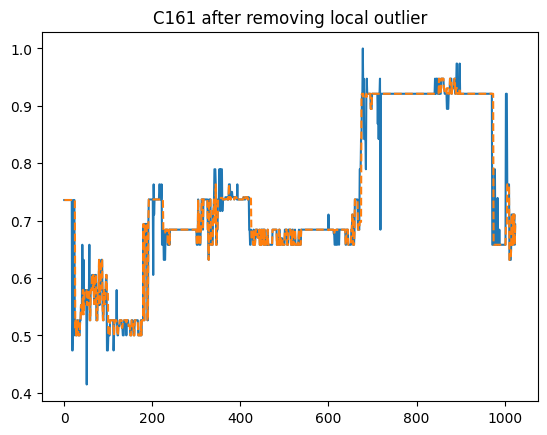

In [2087]:
plt.plot(normalized_df['c161'] )
plt.plot(normalized_df['c161_1'],linestyle='--')
plt.title("C161 after removing local outlier");

# Cleaning c158


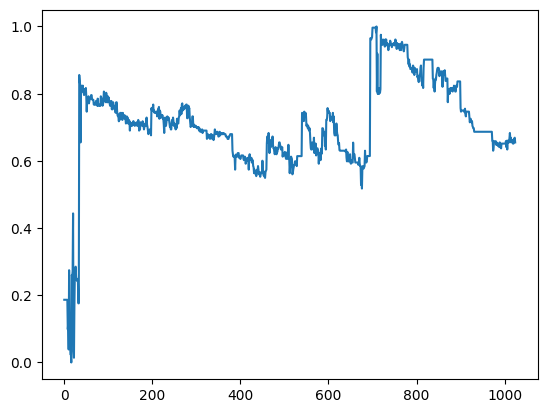

In [2088]:
plt.plot(normalized_df['c158'])

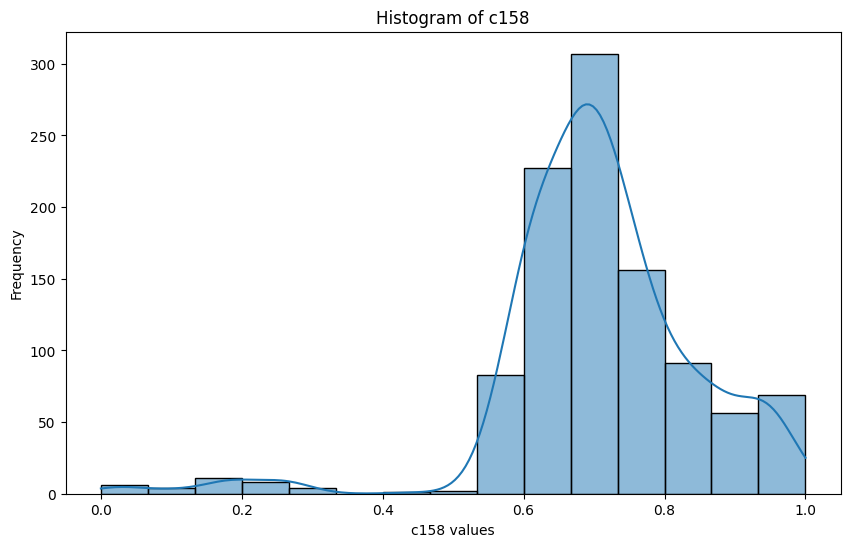

In [2089]:
column='c158'
plt.figure(figsize=(10, 6))
sns.histplot(normalized_df[column], bins=15, kde=True)
plt.title(f'Histogram of {column}')
plt.xlabel('c158 values')
plt.ylabel('Frequency')
plt.show()

In [2090]:
# Calculate the IQR for 'c158' column
q1 = normalized_df['c158'].quantile(0.25)
q3 = normalized_df['c158'].quantile(0.75)
iqr = q3 - q1

# Calculate lower and upper bounds for outliers
lower_bound = q1 -  1.4* iqr
upper_bound = q3 + 1.4* iqr

# Replace outliers with the mean of the remaining data in 'c158' column
normalized_df['c158'] = normalized_df['c158'].apply(lambda x: normalized_df['c158'][(normalized_df['c158'] >= lower_bound) & (normalized_df['c158'] <= upper_bound)].mean() if (x < lower_bound or x > upper_bound) else x)


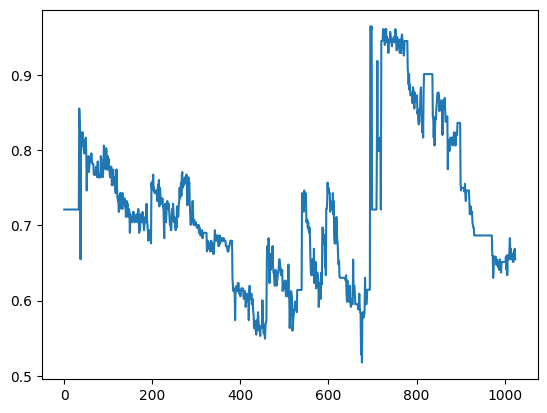

In [2091]:
plt.plot(normalized_df['c158']);

In [2092]:
step_size = 50

new_column_data = []  
for i in range(0, len(normalized_df['c158']), step_size):
    
    # Get the current 50 data points
    data_subset = normalized_df['c158'].iloc[i:i+step_size].copy()
        
    # Calculate the IQR for the current subset
    q1 = np.percentile(data_subset, 25)
    q3 = np.percentile(data_subset, 75)
    iqr = q3 - q1
        
    # Calculate the lower and upper bounds for outliers
    lower_bound = q1 - 0.5 * iqr
    upper_bound = q3 + 0.5 * iqr
    # Calculate mean for non-outliers within the subset
    subset_mean = data_subset[(data_subset >= lower_bound) & (data_subset <= upper_bound)].mean()
    # Replace outliers with the mean of the 50 data points
    data_subset[data_subset < lower_bound] = subset_mean
    data_subset[data_subset > upper_bound] = subset_mean
    
    # Explicitly cast subset_mean to int before appending to the new_column_data list
    subset_mean = int(subset_mean)
        
    # Append the modified data to the new_column_data list
    new_column_data.extend(data_subset)
    
normalized_df['c158_1'] = new_column_data


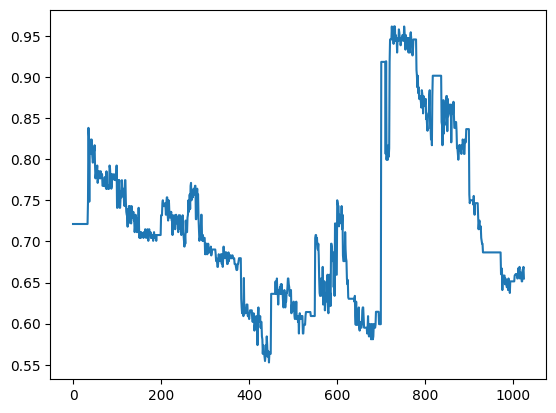

In [2093]:
plt.plot(normalized_df['c158_1'])

# Cleaning c30

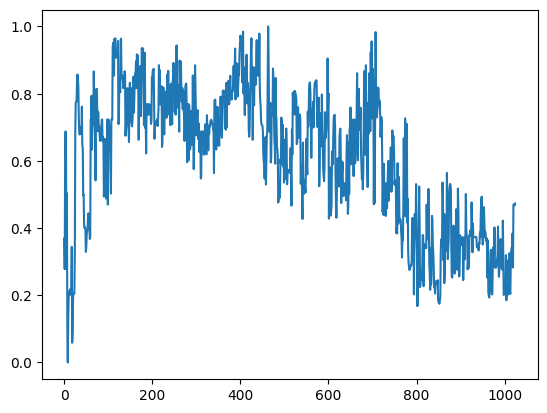

In [2094]:
plt.plot(normalized_df['c30']);

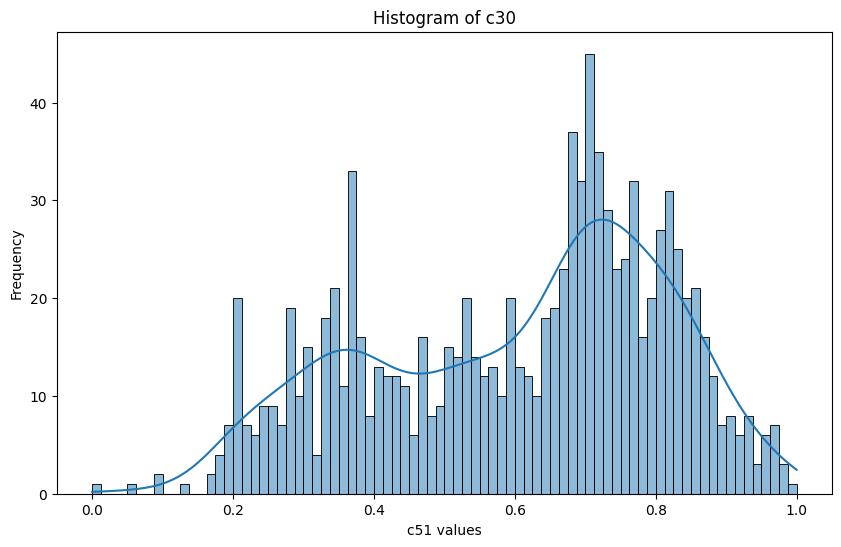

In [2095]:
column='c30'
plt.figure(figsize=(10, 6))
sns.histplot(normalized_df[column], bins=80, kde=True)
plt.title(f'Histogram of {column}')
plt.xlabel('c51 values')
plt.ylabel('Frequency')
plt.show()

In [2096]:
# Define the step size (100 data points at a time)
# we get these step size by analyzing the r^2 value for different different values of step_sizes
step_size = 100

new_column_data = []  
for i in range(0, len(normalized_df['c30']), step_size):
    # Get the current 100 data points
    data_subset = normalized_df['c30'].iloc[i:i+step_size].copy()
        
    # Calculate the IQR for the current subset
    q1 = np.percentile(data_subset, 25)
    q3 = np.percentile(data_subset, 75)
    iqr = q3 - q1
        
    # Calculate the lower and upper bounds for outliers
    # we use 0.2 because that was best in prediction not only during trainng as well as testing
    lower_bound = q1 - 0.2 * iqr
    upper_bound = q3 + 0.2 * iqr

    # Calculate mean for non-outliers within the subset
    subset_mean = data_subset[(data_subset >= lower_bound) & (data_subset <= upper_bound)].mean()
    # Replace outliers with the mean of the 100 data points
    data_subset[data_subset < lower_bound] = subset_mean
    data_subset[data_subset > upper_bound] = subset_mean
    
    subset_mean = int(subset_mean)
        
    # Append the modified data to the new_column_data list
    new_column_data.extend(data_subset)
    
normalized_df['c30_1'] = new_column_data

In [2097]:
for j in range(0,15):
    if(normalized_df['c31'][j]>0.4):
        normalized_df['c31'][j]=0.4


# weighted mean

In [2098]:
# Function to calculate weighted mean
def weighted_mean(series):
    weights = range(1, len(series) + 1)
    return sum(series * weights) / sum(weights)

# Window size for rolling mean
window_size = 110

for column in normalized_df.columns:
    if(column!='c51' and column!='c52' and column!='c53' and column!='c54'):
        normalized_df[column] = normalized_df[column].rolling(window=window_size, min_periods=1).apply(weighted_mean, raw=True)


# Result of c51


In [2099]:
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

# Define the features (X) and target variable (y)
X = normalized_df[['c26', 'c27', 'c28', 'c29', 'c30_1', 'c31', 'c33', 'c39', 'c139', 'c142', 'c143', 'c155', 'c156', 'c157', 'c158_1', 'c160', 'c161_1', 'c162', 'c163']]
y = normalized_df['c51']

# Train the model using Linear Regression from scikit-learn
model = LinearRegression()
model.fit(X, y)

# Add a constant to the features (required for statsmodels)
X_with_const = sm.add_constant(X)

# Fit the model using statsmodels.OLS
statsmodel = sm.OLS(y, X_with_const).fit()

# Get predictions
predictions = statsmodel.predict(X_with_const)

print(statsmodel.summary())

                            OLS Regression Results                            
Dep. Variable:                    c51   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     276.1
Date:                Sun, 12 Nov 2023   Prob (F-statistic):               0.00
Time:                        12:38:43   Log-Likelihood:                 911.59
No. Observations:                1025   AIC:                            -1783.
Df Residuals:                    1005   BIC:                            -1685.
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.5125      0.265     -9.486      0.0

In [2100]:
def backward_elimination(X, y, significance_level=0.05):
    features = X.columns.tolist()
    
    while True:
        # Add a constant term to the features (required for statsmodels)
        X_with_const = sm.add_constant(X)
        
        # Fit the model using statsmodels.OLS
        statsmodel = sm.OLS(y, X_with_const).fit()
        
        # Get p-values of features
        p_values = statsmodel.pvalues[1:]  # Exclude the constant term
        
        # Find the feature with the highest p-value
        max_p_value = p_values.max()
        max_p_value_feature = p_values.idxmax()
        
        # Check if the highest p-value is above the significance level
        if max_p_value > significance_level:
            # Remove the feature with the highest p-value
            features.remove(max_p_value_feature)
            X = X[features]
        else:
            # If the highest p-value is below the significance level, break the loop
            break
    
    return features

selected_features = backward_elimination(X, y)

# after removing high p-value feature in c51 prediction

In [2101]:
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

# Define the features (X) and target variable (y)
X = normalized_df[selected_features]
y = normalized_df['c51']

# Train the model using Linear Regression from scikit-learn
model = LinearRegression()
model.fit(X, y)

# Add a constant to the features (required for statsmodels)
X_with_const = sm.add_constant(X)

# Fit the model using statsmodels.OLS
statsmodel = sm.OLS(y, X_with_const).fit()

# Get predictions
predictions = statsmodel.predict(X_with_const)

print(statsmodel.summary())

                            OLS Regression Results                            
Dep. Variable:                    c51   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     349.7
Date:                Sun, 12 Nov 2023   Prob (F-statistic):               0.00
Time:                        12:38:43   Log-Likelihood:                 909.81
No. Observations:                1025   AIC:                            -1788.
Df Residuals:                    1009   BIC:                            -1709.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.7418      0.169    -16.241      0.0

*most important features*

In [2102]:
coeff_series=pd.Series(abs(statsmodel.params[1:]))
coeff_series=coeff_series.sort_values(ascending=0)
print(coeff_series)

c158_1    2.385871
c31       2.016037
c139      1.866311
c161_1    1.671832
c28       1.438624
c26       1.347055
c142      1.211339
c27       1.093430
c30_1     0.969662
c162      0.911138
c39       0.878225
c160      0.641290
c29       0.559996
c163      0.350979
c33       0.208800
dtype: float64


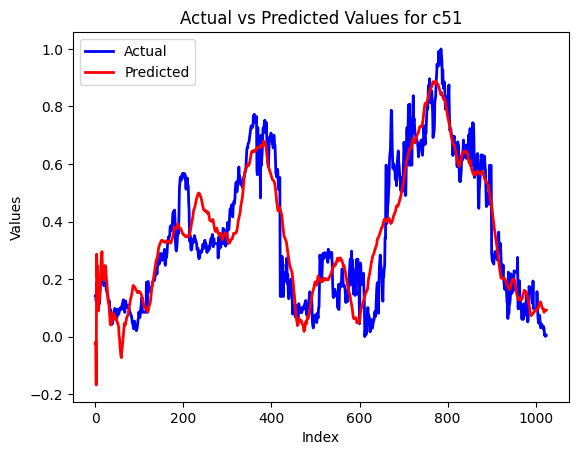

In [2103]:
plt.plot(normalized_df.index, y, color='blue', label='Actual', linewidth=2)
plt.plot(normalized_df.index, predictions, color='red', label='Predicted', linewidth=2)
plt.xlabel('Index')
plt.ylabel('Values')
plt.title('Actual vs Predicted Values for c51')
plt.legend()

In [2104]:
X = normalized_df[['c26', 'c27', 'c28', 'c29', 'c30_1', 'c31', 'c33', 'c39', 'c139', 'c142', 'c143', 'c155', 'c156', 'c157', 'c158_1', 'c160', 'c161_1', 'c162', 'c163']]
y = normalized_df['c51']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

train_score = model.score(X_train, y_train)
test_score = model.score(X_test, y_test)

print(f'Training R^2 score: {train_score:.4f}')
print(f'Testing R^2 score: {test_score:.4f}')

import statsmodels.api as sm

X_with_const = sm.add_constant(X)


model = sm.OLS(y, X_with_const)
results = model.fit()

Training R^2 score: 0.8445
Testing R^2 score: 0.8122


# c52

In [2105]:
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

# Define the features (X) and target variable (y)
X = normalized_df[['c26', 'c27', 'c28', 'c29', 'c30_1', 'c31', 'c33', 'c39', 'c139', 'c142', 'c143', 'c155', 'c156', 'c157', 'c158_1', 'c160', 'c161_1', 'c162', 'c163']]
y_c52 = normalized_df['c52']

# Train the model using Linear Regression from scikit-learn
model = LinearRegression()
model.fit(X, y_c52)

# Add a constant to the features (required for statsmodels)
X_with_const = sm.add_constant(X)

# Fit the model using statsmodels.OLS
statsmodel = sm.OLS(y_c52, X_with_const).fit()

# Get predictions and evaluate the model
predictions_c52 = statsmodel.predict(X_with_const)

print(statsmodel.summary())

                            OLS Regression Results                            
Dep. Variable:                    c52   R-squared:                       0.865
Model:                            OLS   Adj. R-squared:                  0.863
Method:                 Least Squares   F-statistic:                     340.2
Date:                Sun, 12 Nov 2023   Prob (F-statistic):               0.00
Time:                        12:38:43   Log-Likelihood:                 1039.7
No. Observations:                1025   AIC:                            -2039.
Df Residuals:                    1005   BIC:                            -1941.
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.7000      0.234    -11.550      0.0

In [2106]:
def backward_elimination(X, y_c52, significance_level=0.05):
    features = X.columns.tolist()
    
    while True:
        # Add a constant term to the features (required for statsmodels)
        X_with_const = sm.add_constant(X)
        
        # Fit the model using statsmodels.OLS
        statsmodel = sm.OLS(y_c52, X_with_const).fit()
        
        # Get p-values of features
        p_values = statsmodel.pvalues[1:]  # Exclude the constant term
        
        # Find the feature with the highest p-value
        max_p_value = p_values.max()
        max_p_value_feature = p_values.idxmax()
        
        # Check if the highest p-value is above the significance level
        if max_p_value > significance_level:
            # Remove the feature with the highest p-value
            features.remove(max_p_value_feature)
            X = X[features]
        else:
            # If the highest p-value is below the significance level, break the loop
            break
    
    return features

selected_features = backward_elimination(X, y_c52)

# c52 using selected model

In [2107]:
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

X = normalized_df[selected_features]
y_c52 = normalized_df['c52']

# Train the model using Linear Regression from scikit-learn
model = LinearRegression()
model.fit(X, y_c52)

# Add a constant to the features (required for statsmodels)
X_with_const = sm.add_constant(X)

# Fit the model using statsmodels.OLS
statsmodel = sm.OLS(y_c52, X_with_const).fit()

# Get predictions and evaluate the model
predictions_c52 = statsmodel.predict(X_with_const)

print(statsmodel.summary())

                            OLS Regression Results                            
Dep. Variable:                    c52   R-squared:                       0.864
Model:                            OLS   Adj. R-squared:                  0.863
Method:                 Least Squares   F-statistic:                     460.1
Date:                Sun, 12 Nov 2023   Prob (F-statistic):               0.00
Time:                        12:38:43   Log-Likelihood:                 1036.0
No. Observations:                1025   AIC:                            -2042.
Df Residuals:                    1010   BIC:                            -1968.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -3.0221      0.139    -21.710      0.0

In [2108]:
coeff_series=pd.Series(abs(statsmodel.params[1:]))
coeff_series=coeff_series.sort_values(ascending=0)
print(coeff_series)

c158_1    2.475753
c142      1.855676
c31       1.715532
c161_1    1.583755
c28       1.544406
c30_1     1.477736
c160      0.818594
c27       0.730599
c139      0.654002
c29       0.631874
c143      0.450242
c163      0.307030
c33       0.252363
c39       0.094595
dtype: float64


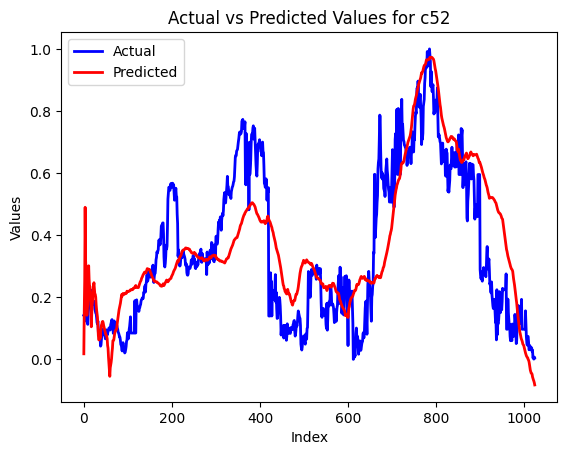

In [2109]:
plt.plot(normalized_df.index, y, color='blue', label='Actual', linewidth=2)
plt.plot(normalized_df.index, predictions_c52, color='red', label='Predicted', linewidth=2)
plt.xlabel('Index')
plt.ylabel('Values')
plt.title('Actual vs Predicted Values for c52')
plt.legend();

# c53 model


In [2110]:
X = normalized_df[['c26', 'c27', 'c28', 'c29', 'c30_1', 'c31', 'c33', 'c39', 'c139', 'c142', 'c143', 'c155', 'c156', 'c157', 'c158_1', 'c160', 'c161_1', 'c162', 'c163']]
y_c53 = normalized_df['c53']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y_c53, test_size=0.2, random_state=42)

from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

train_score = model.score(X_train, y_train)
test_score = model.score(X_test, y_test)

print(f'Training R^2 score: {train_score:.4f}')
print(f'Testing R^2 score: {test_score:.4f}')

import statsmodels.api as sm

X_with_const = sm.add_constant(X)


model = sm.OLS(y_c53, X_with_const)
results = model.fit()

Training R^2 score: 0.9560
Testing R^2 score: 0.9515


In [2111]:
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

X = normalized_df[['c26', 'c27', 'c28', 'c29', 'c30_1', 'c31', 'c33', 'c39', 'c139', 'c142', 'c143', 'c155', 'c156', 'c157', 'c158_1', 'c160', 'c161_1', 'c162', 'c163']]
y_c53 = normalized_df['c53']

model = LinearRegression()
model.fit(X, y)

X_with_const = sm.add_constant(X)

statsmodel = sm.OLS(y_c53, X_with_const).fit()

# Get predictions and evaluate the model
predictions_c53 = statsmodel.predict(X_with_const)

print(statsmodel.summary())

                            OLS Regression Results                            
Dep. Variable:                    c53   R-squared:                       0.956
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     1137.
Date:                Sun, 12 Nov 2023   Prob (F-statistic):               0.00
Time:                        12:38:44   Log-Likelihood:                 1498.5
No. Observations:                1025   AIC:                            -2957.
Df Residuals:                    1005   BIC:                            -2858.
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.4832      0.149     -9.928      0.0

In [2112]:
def backward_elimination(X, y_c53, significance_level=0.05):
    features = X.columns.tolist()
    
    while True:
        # Add a constant term to the features (required for statsmodels)
        X_with_const = sm.add_constant(X)
        
        # Fit the model using statsmodels.OLS
        statsmodel = sm.OLS(y_c53, X_with_const).fit()
        
        # Get p-values of features
        p_values = statsmodel.pvalues[1:]  # Exclude the constant term
        
        # Find the feature with the highest p-value
        max_p_value = p_values.max()
        max_p_value_feature = p_values.idxmax()
        
        # Check if the highest p-value is above the significance level
        if max_p_value > significance_level:
            # Remove the feature with the highest p-value
            features.remove(max_p_value_feature)
            X = X[features]
        else:
            # If the highest p-value is below the significance level, break the loop
            break
    
    return features

selected_features = backward_elimination(X, y_c53)

# prediction of c53 using selected columns

In [2113]:
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

X = normalized_df[selected_features]
y_c53 = normalized_df['c53']

model = LinearRegression()
model.fit(X, y)

X_with_const = sm.add_constant(X)

statsmodel = sm.OLS(y_c53, X_with_const).fit()

predictions_c53 = statsmodel.predict(X_with_const)

print(statsmodel.summary())

                            OLS Regression Results                            
Dep. Variable:                    c53   R-squared:                       0.955
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     1538.
Date:                Sun, 12 Nov 2023   Prob (F-statistic):               0.00
Time:                        12:38:44   Log-Likelihood:                 1494.4
No. Observations:                1025   AIC:                            -2959.
Df Residuals:                    1010   BIC:                            -2885.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.5297      0.086    -17.834      0.0

*most significant*

In [2114]:
coeff_series=pd.Series(abs(statsmodel.params[1:]))
coeff_series=coeff_series.sort_values(ascending=0)
print(coeff_series)

c142      1.361358
c30_1     1.317734
c161_1    0.956725
c28       0.764761
c155      0.670144
c163      0.624309
c156      0.540530
c26       0.520342
c143      0.491239
c39       0.433906
c27       0.385479
c31       0.385005
c158_1    0.311210
c33       0.310546
dtype: float64


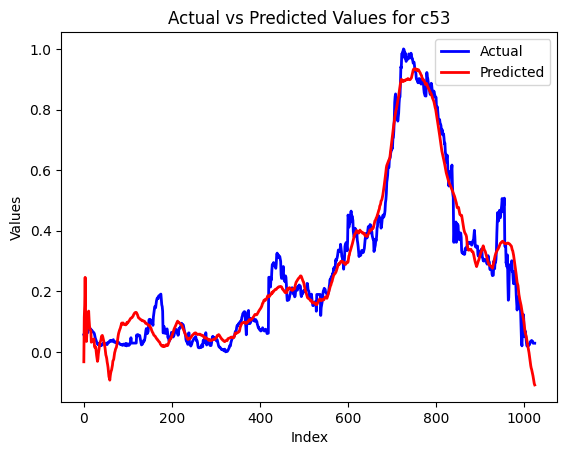

In [2115]:
plt.plot(normalized_df.index, y_c53, color='blue', label='Actual', linewidth=2)
plt.plot(normalized_df.index, predictions_c53, color='red', label='Predicted', linewidth=2)
plt.xlabel('Index')
plt.ylabel('Values')
plt.title('Actual vs Predicted Values for c53')
plt.legend();

# c54

In [2116]:
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

X = normalized_df[['c26', 'c27', 'c28', 'c29', 'c30_1', 'c31', 'c33', 'c39', 'c139', 'c142', 'c143', 'c155', 'c156', 'c157', 'c158_1', 'c160', 'c161_1', 'c162', 'c163']]
y_c54 = normalized_df['c54']

model = LinearRegression()
model.fit(X, y_c54)

X_with_const = sm.add_constant(X)

statsmodel = sm.OLS(y_c54, X_with_const).fit()

predictions_c54 = statsmodel.predict(X_with_const)

print(statsmodel.summary())

                            OLS Regression Results                            
Dep. Variable:                    c54   R-squared:                       0.926
Model:                            OLS   Adj. R-squared:                  0.924
Method:                 Least Squares   F-statistic:                     660.5
Date:                Sun, 12 Nov 2023   Prob (F-statistic):               0.00
Time:                        12:38:44   Log-Likelihood:                 1270.3
No. Observations:                1025   AIC:                            -2501.
Df Residuals:                    1005   BIC:                            -2402.
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.6801      0.187     -9.002      0.0

In [2117]:
def backward_elimination(X, y_c54, significance_level=0.05):
    features = X.columns.tolist()
    
    while True:
        X_with_const = sm.add_constant(X)
        
        statsmodel = sm.OLS(y_c54, X_with_const).fit()
        
        p_values = statsmodel.pvalues[1:]
        
        max_p_value = p_values.max()
        max_p_value_feature = p_values.idxmax()
        
        if max_p_value > significance_level:
            features.remove(max_p_value_feature)
            X = X[features]
        else:
            break
    
    return features

selected_features = backward_elimination(X, y_c54)

# c54 prediction using selected columns

In [2118]:
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

X = normalized_df[selected_features]
y_c54 = normalized_df['c54']

# Train the model using Linear Regression from scikit-learn
model = LinearRegression()
model.fit(X, y_c54)

# Add a constant to the features (required for statsmodels)
X_with_const = sm.add_constant(X)

# Fit the model using statsmodels.OLS
statsmodel = sm.OLS(y_c54, X_with_const).fit()

# Gett predictions and evaluate the model
predictions_c54 = statsmodel.predict(X_with_const)

print(statsmodel.summary())

                            OLS Regression Results                            
Dep. Variable:                    c54   R-squared:                       0.926
Model:                            OLS   Adj. R-squared:                  0.925
Method:                 Least Squares   F-statistic:                     898.3
Date:                Sun, 12 Nov 2023   Prob (F-statistic):               0.00
Time:                        12:38:44   Log-Likelihood:                 1269.0
No. Observations:                1025   AIC:                            -2508.
Df Residuals:                    1010   BIC:                            -2434.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.6752      0.089    -18.744      0.0

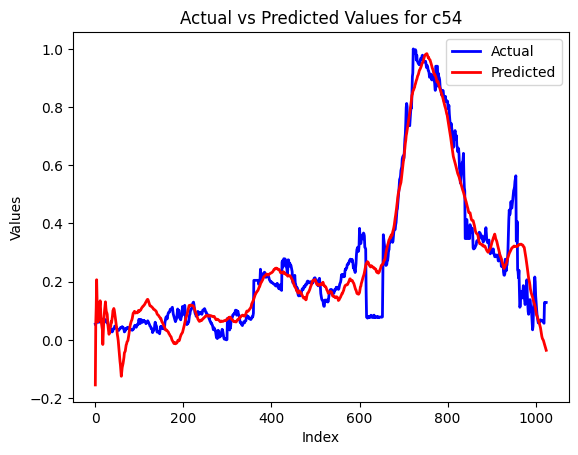

In [2119]:
plt.plot(normalized_df.index, y_c54, color='blue', label='Actual', linewidth=2)
plt.plot(normalized_df.index, predictions_c54, color='red', label='Predicted', linewidth=2)
plt.xlabel('Index')
plt.ylabel('Values')
plt.title('Actual vs Predicted Values for c54')
plt.legend();

*most important features*

In [2120]:
coeff_series=pd.Series(abs(statsmodel.params[1:]))
coeff_series=coeff_series.sort_values(ascending=0)
print(coeff_series)

c143      1.709137
c30_1     1.625209
c161_1    1.619935
c155      1.157895
c142      0.982718
c39       0.689945
c156      0.596002
c160      0.510160
c26       0.505677
c163      0.353851
c33       0.290800
c31       0.263651
c157      0.212661
c162      0.082239
dtype: float64
